ELE489 Fundamentals of Machine Learning HW-5
Linear and Non-Linear Support Vector Machines 

Libraries

In [134]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

Firstly we create toy datas which will not work with linear SVMs, but will work with non-linear SVMs

Circles

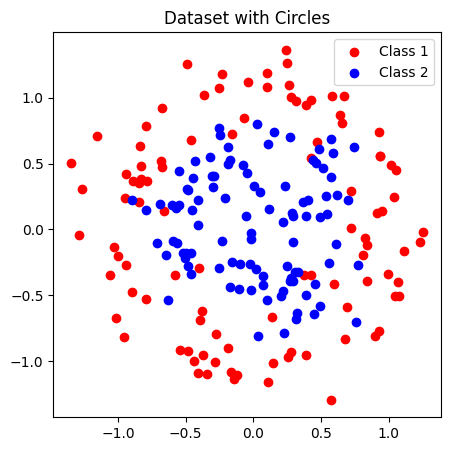

In [135]:
X, y = make_circles(n_samples=200, factor=0.5, noise=0.2, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.title("Dataset with Circles")
plt.legend()
plt.show()


Moons

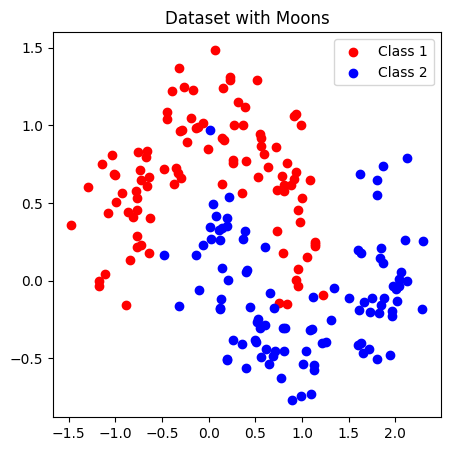

In [136]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.title("Dataset with Moons")
plt.legend()
plt.show()


xor

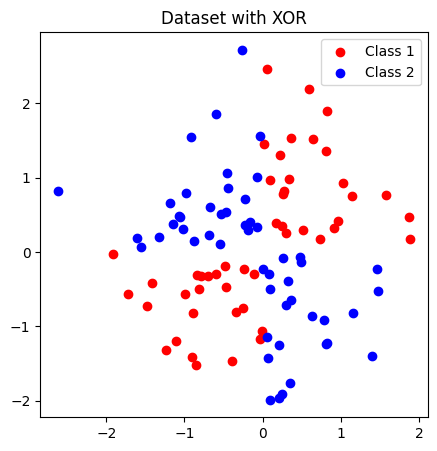

In [137]:
np.random.seed(42)
N = 100
X = np.random.randn(N, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # XOR
plt.figure(figsize=(5,5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 1')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 2')
plt.title("Dataset with XOR")
plt.legend()
plt.show()


Now I use Linear SVM with different margin sizes by changing the C parameter with moons dataset.

In [138]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

clf_linear1 = SVC(kernel='linear', C=1)
clf_linear1.fit(X, y)

y_pred1 = clf_linear1.predict(X)

clf_linear10 = SVC(kernel='linear', C=10)
clf_linear10.fit(X, y)

y_pred10 = clf_linear10.predict(X)


Then I visulaized the results to see wich one is the better choice.

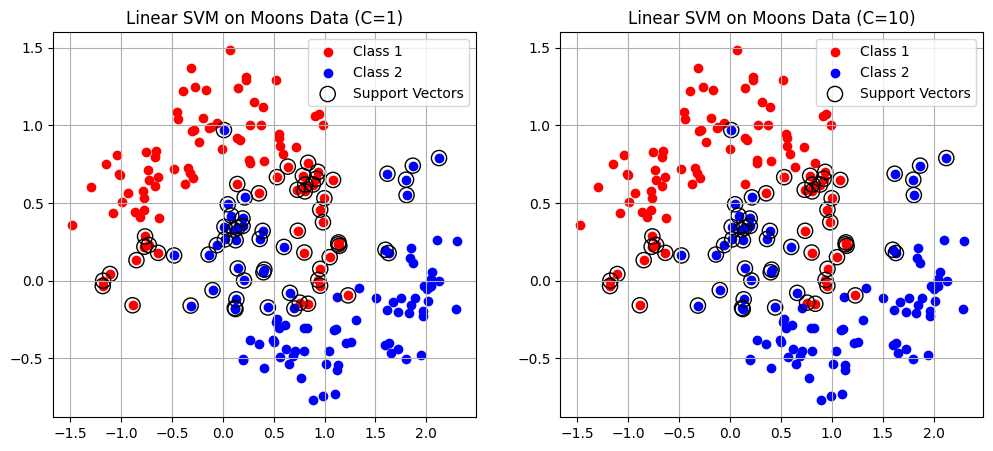

In [139]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')

plt.scatter(clf_linear1.support_vectors_[:,0], clf_linear1.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Linear SVM on Moons Data (C=1)")
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')
plt.scatter(clf_linear10.support_vectors_[:,0], clf_linear10.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')

plt.title("Linear SVM on Moons Data (C=10)")
plt.legend()
plt.grid(True)

plt.show()


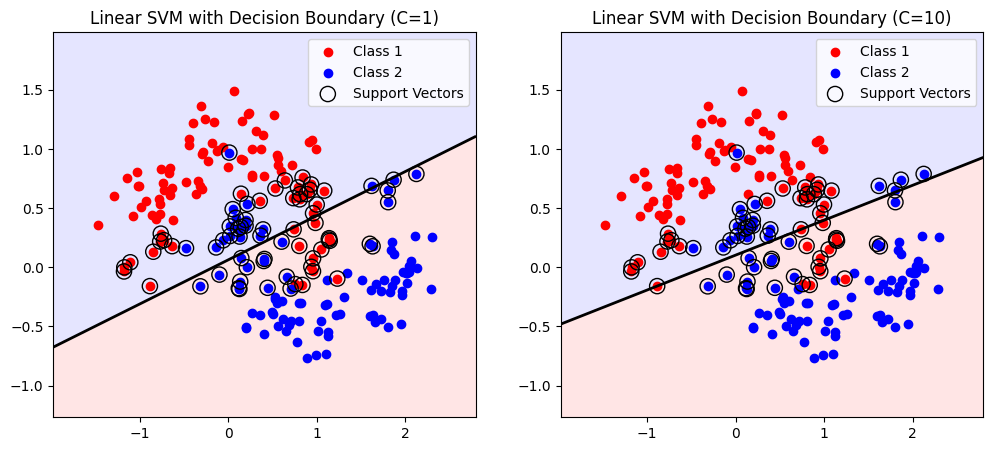

In [140]:
xx1, yy1 = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z1 = clf_linear1.decision_function(np.c_[xx1.ravel(), yy1.ravel()])
Z1 = Z1.reshape(xx1.shape)

xx10, yy10 = np.meshgrid(np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, 200),
                     np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, 200))
Z10 = clf_linear10.decision_function(np.c_[xx10.ravel(), yy10.ravel()])
Z10 = Z10.reshape(xx10.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.contourf(xx1, yy1, Z1 > 0, alpha=0.2, cmap='bwr')
plt.contour(xx1, yy1, Z1, levels=[0], linewidths=2, colors='k')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')
plt.scatter(clf_linear1.support_vectors_[:,0], clf_linear1.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Linear SVM with Decision Boundary (C=1)")
plt.legend()

plt.subplot(1,2,2)
plt.contourf(xx10, yy10, Z10 > 0, alpha=0.2, cmap='bwr')
plt.contour(xx10, yy10, Z10, levels=[0], linewidths=2, colors='k')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')
plt.scatter(clf_linear10.support_vectors_[:,0], clf_linear10.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Linear SVM with Decision Boundary (C=10)")
plt.legend()

plt.show()


Accuracy and misscalsifications calculations

In [141]:
accuracy1 = accuracy_score(y, y_pred1)
misclassified1 = (y != y_pred1).sum()

print(f"Accuracy and Misclaasification calculations for C=1")
print(f"Linear SVM Accuracy: {accuracy1:.2f}")
print(f"Number of misclassified points: {misclassified1}")

accuracy10 = accuracy_score(y, y_pred10)
misclassified10 = (y != y_pred10).sum()

print(f"Accuracy and Misclaasification calculations for C=10")
print(f"Linear SVM Accuracy: {accuracy10:.2f}")
print(f"Number of misclassified points: {misclassified10}")


Accuracy and Misclaasification calculations for C=1
Linear SVM Accuracy: 0.85
Number of misclassified points: 30
Accuracy and Misclaasification calculations for C=10
Linear SVM Accuracy: 0.83
Number of misclassified points: 33


AS we see in the previous results for this dataset linear SVm is not effective. Now I will try non-linear SVMs such as RBF Kernel, Polynomial Kernel and Sigmoid Kernel.

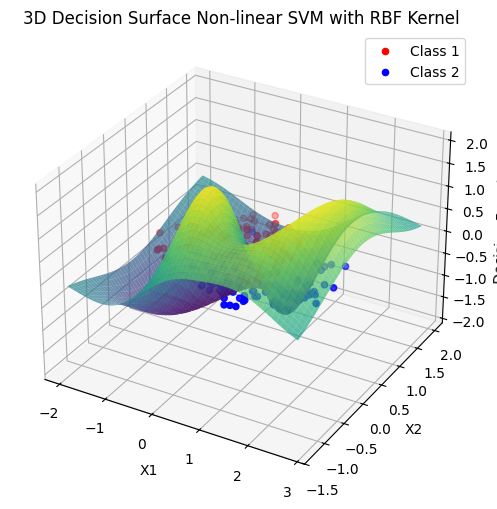

In [142]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# RBF kernel 
clf_rbf = SVC(kernel='rbf', C=1)
clf_rbf.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
Z = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.7)

ax.scatter(X[y==0,0], X[y==0,1], 0, color='red', label='Class 1')
ax.scatter(X[y==1,0], X[y==1,1], 0, color='blue', label='Class 2')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Decision Surface Non-linear SVM with RBF Kernel')
plt.legend()
plt.show()


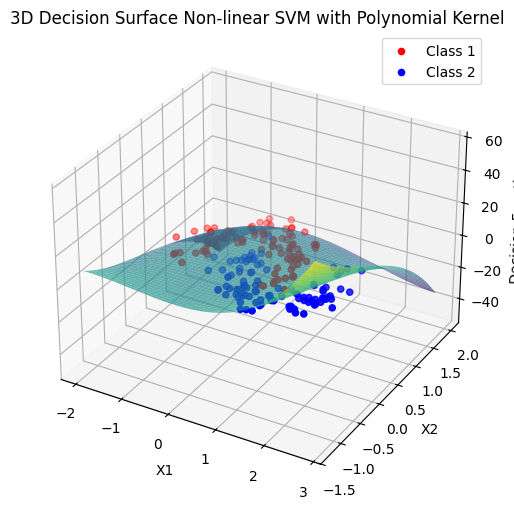

In [143]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# poly kernel 
clf_poly = SVC(kernel='poly', C=1)
clf_poly.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
Z = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.7)

ax.scatter(X[y==0,0], X[y==0,1], 0, color='red', label='Class 1')
ax.scatter(X[y==1,0], X[y==1,1], 0, color='blue', label='Class 2')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Decision Surface Non-linear SVM with Polynomial Kernel')
plt.legend()
plt.show()


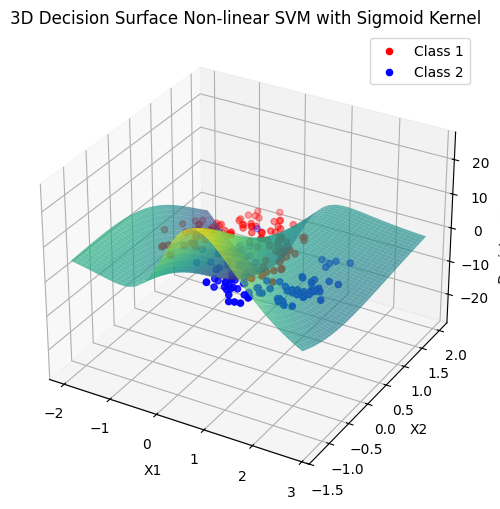

In [144]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

# sigmoid kernel 
clf_sigm = SVC(kernel='sigmoid', C=1)
clf_sigm.fit(X, y)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 100),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 100))
Z = clf_sigm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xx, yy, Z, cmap='viridis', alpha=0.7)

ax.scatter(X[y==0,0], X[y==0,1], 0, color='red', label='Class 1')
ax.scatter(X[y==1,0], X[y==1,1], 0, color='blue', label='Class 2')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Decision Surface Non-linear SVM with Sigmoid Kernel')
plt.legend()
plt.show()


Accuracy and missclasification calculations

In [145]:
kernels = ['rbf', 'poly', 'sigmoid']
titles = ['RBF Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']
results = []

for kernel, title in zip(kernels, titles):
    clf = SVC(kernel=kernel, C=1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    acc = accuracy_score(y, y_pred)
    miscls = (y != y_pred).sum()
    results.append((title, acc, miscls))

print("Kernel Type\t\tAccuracy\tMisclassifications")
for r in results:
    print(f"{r[0]:<20}{r[1]:.2f}\t\t{r[2]}")



Kernel Type		Accuracy	Misclassifications
RBF Kernel          0.96		8
Polynomial Kernel   0.92		17
Sigmoid Kernel      0.66		68


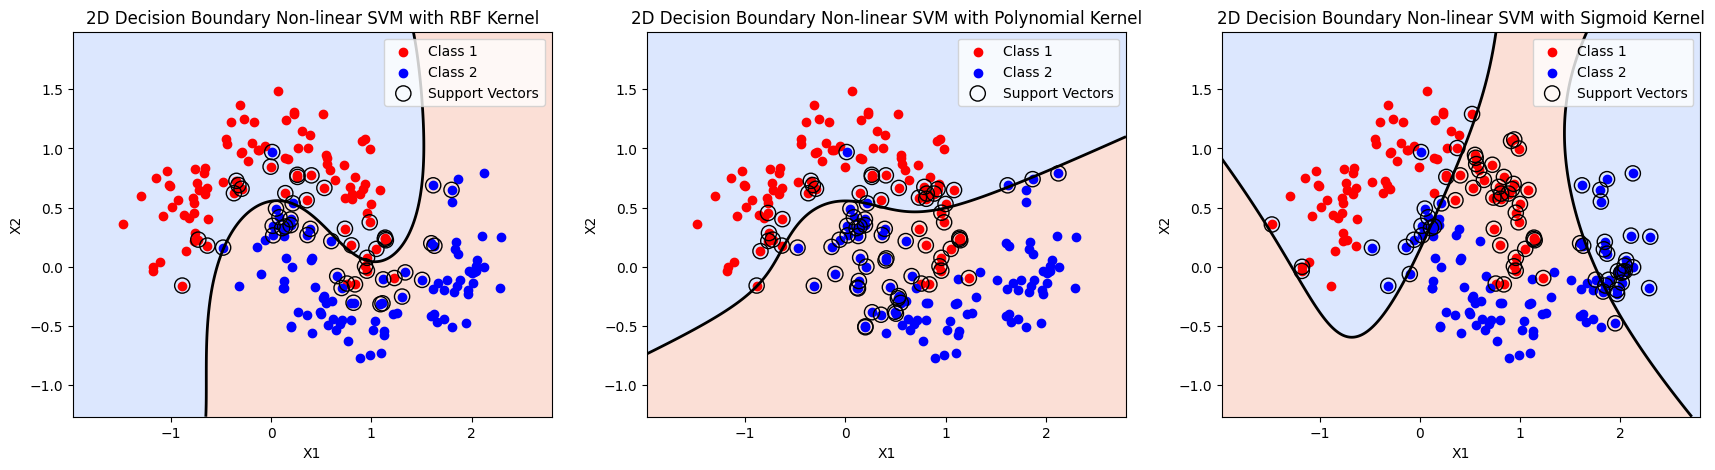

In [146]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

#rbf
clf_rbf = SVC(kernel='rbf', C=1)
clf_rbf.fit(X, y)

xx_r, yy_r = np.meshgrid(
    np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 300),
    np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 300)
)
Z_r = clf_rbf.decision_function(np.c_[xx_r.ravel(), yy_r.ravel()])
Z_r = Z_r.reshape(xx_r.shape)

#poly
clf_poly = SVC(kernel='poly', C=1)
clf_poly.fit(X, y)

xx_p, yy_p = np.meshgrid(
    np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 300),
    np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 300)
)
Z_p = clf_poly.decision_function(np.c_[xx_p.ravel(), yy_p.ravel()])
Z_p = Z_p.reshape(xx_p.shape)

#sigmoid
clf_sigm = SVC(kernel='sigmoid', C=1)
clf_sigm.fit(X, y)

xx_s, yy_s = np.meshgrid(
    np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 300),
    np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 300)
)
Z_s = clf_sigm.decision_function(np.c_[xx_s.ravel(), yy_s.ravel()])
Z_s = Z_s.reshape(xx_s.shape)

plt.figure(figsize=(21,5))
#rbf
plt.subplot(1,3,1)
plt.contourf(xx_r, yy_r, Z_r > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx_r, yy_r, Z_r, levels=[0], linewidths=2, colors='k')

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 2')

plt.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Decision Boundary Non-linear SVM with RBF Kernel')
plt.legend()

#poly
plt.subplot(1,3,2)
plt.contourf(xx_p, yy_p, Z_p > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx_p, yy_p, Z_p, levels=[0], linewidths=2, colors='k')

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 2')

plt.scatter(clf_poly.support_vectors_[:, 0], clf_poly.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Decision Boundary Non-linear SVM with Polynomial Kernel')
plt.legend()

#sigmoid
plt.subplot(1,3,3)
plt.contourf(xx_s, yy_s, Z_s > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx_s, yy_s, Z_s, levels=[0], linewidths=2, colors='k')

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', label='Class 1')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', label='Class 2')

plt.scatter(clf_sigm.support_vectors_[:, 0], clf_sigm.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('2D Decision Boundary Non-linear SVM with Sigmoid Kernel')
plt.legend()

plt.show()
